In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [3]:
def evalf(x,n):
  assert type(x) is np.ndarray and len(x)==n
  f_x = np.sum(((x[i]-1)**2 + (x[0]-x[i]**2)**2) for i in range(n))
  return f_x

In [4]:
def evalg(x,n):
  assert type(x) is np.ndarray and len(x)==n
  gr=[2*x[0]-2+2*(x[0]-x[0]**2)*(1-2*x[0])]
  for i in range(1,n):
    gr[0] = gr[0]+2*(x[0]-x[i]**2)
  for k in range(1,n):
    gr.append(2*(x[k]-1)-4*x[k]*(x[0]-x[k]**2))
  gr=np.array(gr)
  return gr

In [5]:
def evalh(x,n):
  assert type(x) is np.ndarray and len(x)==n
  hess = np.zeros([n,n])
  hess[0][0] = 2 -4*x[0] + 4*x[0]**2 + 2*(1- 2*x[0])**2
  if n>=2:
    for i in range(1,n):
      hess[0][0] = 2+hess[0][0]
      hess[0][i] = -4*x[i]
  for i in range(1,n):
    hess[i][i] = 2 - 4*(x[0] - x[i]*2) + 8*(x[i]**2)
    hess[i][0] = hess[0][i] #it is a symmetric matrix
  return hess


In [6]:
def compute_steplength_backtracking(x,n,gradf,direction,alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n
  assert type(gradf) is np.ndarray and len(gradf) == n
  assert type(direction) is np.ndarray and len(direction) == n
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  gradf = evalg(x,n)
  while evalf(x,n)<evalf(x+alpha*direction,n)+(np.matmul(np.transpose(gradf), direction))*alpha*gamma:
    alpha = alpha*rho
  return alpha

Q3.

In [7]:
#BFGS method:
BACKTRACKING_LINE_SEARCH = 1
def find_minimizer_BFGS(start_x,n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray  and len(start_x) == n   #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0.0 

  x = start_x.reshape((n,1))
  g_x = evalg(x,n)
  I = np.identity(n)
  B_k = I*(1/8)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0 #For counting the iterations
  while (np.linalg.norm(g_x) > tol):
    D = -np.matmul(B_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,n, g_x, D, alpha_start, rho, gamma)
    else:  
      raise ValueError('Line search type unknown. Please check!')

    x_0 = x
    x = np.add(x, np.multiply(step_length,D))
    s_k = x-x_0 #From the theoretical part
    y_k = evalg(x,n)-evalg(x_0,n) #From the proof part

    u_k = 1/((y_k.T)@s_k)
    B_k = np.matmul(np.matmul(np.subtract(I , u_k*np.matmul(s_k,y_k.T)),B_k),np.subtract(I , u_k*np.matmul(y_k, s_k.T))) + u_k*np.matmul(s_k,s_k.T)

    k += 1 #increment iteration
    g_x = evalg(x,n) #compute gradient at new point

  return x, k,evalf(x,n)

In [10]:
list_n = [1000,2500,5000,7500,10000]
alpha_start = 0.9
rho = 0.5
gamma = 0.5
tol = 1e-9

In [8]:
from timeit import default_timer as timer
list_n = [1000,2500,5000,7500,10000]
alpha_start = 0.9
rho = 0.5
gamma = 0.5
tol = 1e-9
Minimizer = []
Time_bfgs = []
for n in list_n:
  my_start_x = np.array([0.0 for i in range(n)])
  start_time = timer()
  minimizer,iters, minimum = find_minimizer_BFGS(my_start_x,n, tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  end_time = timer()
  Time_bfgs.append(end_time-start_time)
  Minimizer.append(minimizer)
  print("for n = ",(n), ": \n Minimizer is :",(minimizer))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


for n =  1000 : 
 Minimizer is : [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

In [9]:
#Tabulating:
from tabulate import tabulate
tabledata = [[list_n[i],Time_bfgs[i]] for i in range(len(list_n))]
header = ['Value of n','Time taken using BFGS']
print(tabulate(tabledata, headers=header, tablefmt="grid"))

+------------+-----------------------+
| Value of n | Time taken using BFGS |
+------------+-----------------------+
|    1000    |   5.050880439000139   |
|    2500    |   37.46910969200053   |
|    5000    |  251.87177749199964   |
|    7500    |   827.1528150309996   |
|   10000    |  2040.8733819629997   |
+------------+-----------------------+


Q5.

In [8]:
#Newtons method:
def find_minimizer_newton_method(start_x,n, tol,line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x)  == n #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0.0

  x = start_x.reshape(n,1) #Reshaping the data
  g_x = evalg(x,n)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k=0 #Counting iterations
  while (np.linalg.norm(g_x) > tol):
    D_k = np.linalg.inv(evalh(x,n))
    D = -np.matmul(D_k, g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,n, g_x, D, alpha_start, rho, gamma)
    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x,np.multiply(step_length,D))
    k += 1 # iteration
    g_x = evalg(x,n) #compute gradient

  return x, k, evalf(x,n)

In [ ]:
from timeit import default_timer as timer
Time_newton = []
Minimizer_n = []
for n in list_n:
  my_start_x = np.array([0.0 for i in range(n)])
  start_time = timer()
  minimizer,iters,minimum = find_minimizer_newton_method(my_start_x,n, tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  end_time = timer()
  Time_newton.append(end_time-start_time)
  Minimizer_n.append(minimizer)
  print("for n = ",(n), ": \n Minimizer is :",(minimizer))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


for n = 1000: 
Minimizer = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
#Tabulating:
data = [[list_n[i],Time_newton[i]] for i in range(len(list_n))]
head = ['Value of n','Time taken using Newton']
print(tabulate(data, headers=head, tablefmt="grid"))

+------------+-------------------------+
| Value of n | Time taken using Newton |
+------------+-------------------------+
|    1000    |    10.52139838200003    |
|    2500    |   107.44841684300002    |
|    5000    |    732.7821858250002    |
|    7500    |   2384.2002829880003    |
|   10000    |     5698.810444593      |
+------------+-------------------------+


Q6.

Plotting Time taken by both methods v/s value n plot:

In [ ]:
plt.plot(list_n,Time_newton)
plt.plot(list_n,Time_bfgs)
plt.title('Plot of Time taken v/s n')
plt.ylabel('Taken Time')
plt.xlabel('Value of n')
plt.legend(["Time taken using Newton",'Time taken using BFGS'])
plt.show()

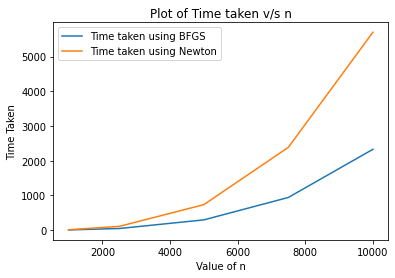

In [ ]:
plt.plot(list_n,Time_bfgs)
plt.plot(list_n,Time_newton)
plt.title('Plot of Time taken v/s n')
plt.ylabel('Taken Time')
plt.xlabel('Value of n')
plt.legend(['Time taken using BFGS',"Time taken using Newton"])
plt.show()

Time taken by BFGS is less than Time taken by Newton's method. and both the time increase with increasing of n.